In [ ]:
# import
import numpy as np
import librosa
import sys

sys.path.append("/home/a.jajodia.229/acoustic/acoustic_knowledge_discovery")
from egci_spectrograms_clustering.utils import *
from pyha_analyzer import extractors

In [2]:
# getting all the wavs
preprocessor = MelSpectrogramPreprocessorsNew(duration=5)
music_extractor = extractors.Music()
music_ads = music_extractor("/home/a.jajodia.229/acoustic/local_data/muha/Liked Sounds/Location A Sand Forrest")
music_ads.set_transform(preprocessor)

Casting the dataset:   0%|          | 0/498 [00:00<?, ? examples/s]

Casting the dataset:   0%|          | 0/64 [00:00<?, ? examples/s]

Casting the dataset:   0%|          | 0/150 [00:00<?, ? examples/s]

[Text(0.5, 1.0, 'Mel-frequency spectrogram')]

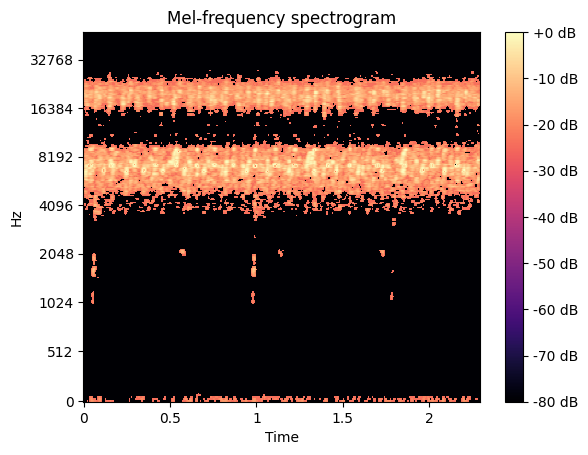

In [30]:
S = music_ads['train'][32]['audio'].squeeze()

S_dB = librosa.power_to_db(S, ref=np.max)
fig, ax = plt.subplots()

img = librosa.display.specshow(S_dB, x_axis='time',
                         y_axis='mel', sr=music_ads['train'][32]['sample_rate'], ax=ax)
fig.colorbar(img, ax=ax, format='%+2.0f dB')
ax.set(title='Mel-frequency spectrogram')


In [34]:
def get_bands_sorted(mel_spectrogram, sample_rate):
    """
    Returns frequency bands from this document 
    (https://docs.google.com/document/d/1I49OEw9DfDSyOiA5v7q0A9dZIIwR1ALcGuyE4zhR7pc) 
    sorted by activity level
    """
    freq_sum = np.sum(mel_spectrogram, axis=1)
    
    mel_freqs = librosa.mel_frequencies(256, fmax=sample_rate/2)
    
    bands_hz = [[0, 2_500], [2_500, 4_000], [4_000, 8_000], [8000, 20_000], [20_000, 250_000]]
    band_labels = np.array(["low", "mid", "active", "high", "ultra"])
    
    label = band_labels[np.argsort([np.sum(freq_sum[((mel_freqs > band_min) == (mel_freqs < band_max))]) for band_min, band_max in bands_hz])[::-1]]
    
    return label

In [35]:
get_bands_sorted(music_ads['train'][32]["audio"][0], music_ads['train'][32]["sample_rate"])

array(['active', 'high', 'ultra', 'low', 'mid'], dtype='<U6')

In [37]:
for value in [[0, 2_500], [2_500, 4_000], [4_000, 8_000], [8000, 20_000], [20_000, 250_000]]:
    print(value[1])

2500
4000
8000
20000
250000
